In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd # pandas 라이브러리 불러오기

# 데이터 파일 경로 설정
file_path = '/content/drive/MyDrive/공모전/대한임상학회/bmi_mets_2019_2023.parquet'

# parquet 파일 읽어서 DataFrame으로 저장
df = pd.read_parquet(file_path)

# 데이터프레임의 처음 5행 출력하여 데이터 확인
display(df.head())

,year,BMI,sex,HE_wc,HE_TG,HE_HDL,HE_sbp,HE_dbp,HE_glu,age
0,2019,25.987394,1.0,98.5,196.0,56.0,122.0,84.0,136.0,61.0
1,2019,16.900942,1.0,63.3,45.0,49.0,111.0,73.0,81.0,28.0
2,2019,19.781829,1.0,74.7,91.0,52.0,125.0,85.0,90.0,53.0
3,2019,26.631647,2.0,84.4,117.0,45.0,109.0,77.0,93.0,50.0
4,2019,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0


In [ ]:
df

,year,BMI,sex,HE_wc,HE_TG,HE_HDL,HE_sbp,HE_dbp,HE_glu,age
0,2019,25.987394,1.0,98.5,196.0,56.0,122.0,84.0,136.0,61.0
1,2019,16.900942,1.0,63.3,45.0,49.0,111.0,73.0,81.0,28.0
2,2019,19.781829,1.0,74.7,91.0,52.0,125.0,85.0,90.0,53.0
3,2019,26.631647,2.0,84.4,117.0,45.0,109.0,77.0,93.0,50.0
4,2019,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
...,...,...,...,...,...,...,...,...,...,...
35712,2023,24.001128,1.0,97.0,188.0,38.0,118.5,68.5,101.0,80.0
35713,2023,28.977553,2.0,97.0,110.0,71.0,139.0,85.0,104.0,78.0
35714,2023,19.093750,2.0,66.3,91.0,46.0,126.0,83.5,90.0,61.0
35715,2023,24.916409,1.0,87.6,167.0,36.0,137.0,78.5,111.0,57.0


In [ ]:
# 연도별 BMI 평균 계산
average_bmi_by_year = df.groupby('year')['BMI'].mean()

# 연도별 BMI 분포 확인 (예: describe 사용)
distribution_bmi_by_year = df.groupby('year')['BMI'].describe()

print("연도별 BMI 평균:")
display(average_bmi_by_year)

print("\n연도별 BMI 분포:")
display(distribution_bmi_by_year)

연도별 BMI 평균:


,BMI
year,
2019,22.982782
2020,23.372083
2021,23.339674
2022,23.337933
2023,23.257215



연도별 BMI 분포:


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2019,7663.0,22.982782,4.204842,11.443422,20.314625,22.939541,25.506340,50.289632
2020,6981.0,23.372083,4.271386,12.522534,20.621643,23.342663,25.913284,62.640542
2021,6598.0,23.339674,4.167353,12.186357,20.627899,23.274859,25.877563,51.904871
2022,6142.0,23.337933,4.238911,12.178672,20.664725,23.226958,25.744979,47.956734
2023,6804.0,23.257215,4.171344,11.894753,20.489696,23.165137,25.777679,44.339130


In [ ]:
# 코로나19 팬데믹 이전과 이후 데이터 분리
df_pre_pandemic = df[df['year'] == 2019]
df_post_pandemic = df[df['year'] >= 2020]

# 팬데믹 이전과 이후의 BMI 평균 비교
average_bmi_pre_pandemic = df_pre_pandemic['BMI'].mean()
average_bmi_post_pandemic = df_post_pandemic['BMI'].mean()

print(f"코로나19 팬데믹 이전 (2019년) BMI 평균: {average_bmi_pre_pandemic:.2f}")
print(f"코로나19 팬데믹 이후 (2020-2023년) BMI 평균: {average_bmi_post_pandemic:.2f}")

# 팬데믹 이전과 이후의 BMI 분포 비교 (describe 사용)
distribution_bmi_pre_pandemic = df_pre_pandemic['BMI'].describe()
distribution_bmi_post_pandemic = df_post_pandemic['BMI'].describe()

print("코로나19 팬데믹 이전 (2019년) BMI 분포:")
display(distribution_bmi_pre_pandemic)

print("코로나19 팬데믹 이후 (2020-2023년) BMI 분포:")
display(distribution_bmi_post_pandemic)

코로나19 팬데믹 이전 (2019년) BMI 평균: 22.98
코로나19 팬데믹 이후 (2020-2023년) BMI 평균: 23.33
코로나19 팬데믹 이전 (2019년) BMI 분포:


,BMI
count,7663.000000
mean,22.982782
std,4.204842
min,11.443422
25%,20.314625
50%,22.939541
75%,25.506340
max,50.289632


코로나19 팬데믹 이후 (2020-2023년) BMI 분포:


,BMI
count,26525.000000
mean,23.326649
std,4.212547
min,11.894753
25%,20.608483
50%,23.252176
75%,25.833118
max,62.640542


In [ ]:
# 성별에 따른 BMI 평균 계산
average_bmi_by_sex = df.groupby('sex')['BMI'].mean()

# 성별에 따른 BMI 분포 확인 (describe 사용)
distribution_bmi_by_sex = df.groupby('sex')['BMI'].describe()

print("성별 BMI 평균:")
display(average_bmi_by_sex)

print("성별 BMI 분포:")
display(distribution_bmi_by_sex)

성별 BMI 평균:


,BMI
sex,
1.0,23.729003
2.0,22.850567
88.0,NaN


성별 BMI 분포:


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
1.0,15529.0,23.729003,4.221677,11.443422,21.289825,23.845339,26.233684,51.904871
2.0,18659.0,22.850567,4.164372,11.894753,20.125014,22.609667,25.281459,62.640542
88.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 연령대 구분을 위한 함수 (예: 10세 단위)
def categorize_age(age):
    if pd.isna(age):
        return 'Unknown'
    elif age < 20:
        return '0-19'
    elif 20 <= age < 30:
        return '20-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    elif 60 <= age < 70:
        return '60-69'
    else:
        return '70+'

# 'age' 컬럼을 사용하여 연령대 컬럼 생성
df['age_group'] = df['age'].apply(categorize_age)

# 연령대별 BMI 평균 계산
average_bmi_by_age_group = df.groupby('age_group')['BMI'].mean()

# 연령대별 BMI 분포 확인 (describe 사용)
distribution_bmi_by_age_group = df.groupby('age_group')['BMI'].describe()

print("연령대별 BMI 평균:")
display(average_bmi_by_age_group)

print("연령대별 BMI 분포:")
display(distribution_bmi_by_age_group)

연령대별 BMI 평균:


,BMI
age_group,
0-19,19.166818
20-29,23.499742
30-39,24.096771
40-49,24.209150
50-59,24.240447
60-69,24.316857
70+,23.911642


연령대별 BMI 분포:


,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
0-19,5801.0,19.166818,4.187479,11.894753,15.981295,18.212390,21.522730,44.145596
20-29,3179.0,23.499742,4.632732,14.136286,20.263076,22.725839,25.724935,62.640542
30-39,3664.0,24.096771,4.236435,14.140248,20.960458,23.566247,26.542288,47.956734
40-49,4871.0,24.209150,3.883984,15.375148,21.417549,23.738244,26.428451,45.934738
50-59,5273.0,24.240447,3.443126,15.015250,21.806632,23.943776,26.251316,42.698886
60-69,5770.0,24.316857,3.225316,13.977506,22.135536,24.122579,26.196756,39.496876
70+,5630.0,23.911642,3.182104,11.443422,21.801012,23.886693,25.852937,40.358908


In [ ]:
# 대사성질환 정의 (예시: 허리둘레, 중성지방, HDL 콜레스테롤, 혈압(수축기 또는 이완기), 공복혈당 중 3개 이상 해당)
# 실제 정의는 분석 목적 및 기준에 따라 달라질 수 있습니다.
# 여기서는 결측치를 고려하여 조건을 적용합니다.

df['mets_criteria_count'] = (
    (df['HE_wc'] >= 90).astype(int) +  # 허리둘레 남성 >= 90cm (여성은 기준 다름, 여기서는 단순화)
    (df['HE_TG'] >= 150).astype(int) + # 중성지방 >= 150 mg/dL
    (df['HE_HDL'] < 40).astype(int) + # HDL 콜레스테롤 < 40 mg/dL (남성, 여성은 기준 다름)
    ((df['HE_sbp'] >= 130) | (df['HE_dbp'] >= 85)).astype(int) + # 혈압 >= 130/85 mmHg
    (df['HE_glu'] >= 100).astype(int) # 공복혈당 >= 100 mg/dL
)

# 대사성질환 유무 판단 (3개 이상 기준 충족)
# 결측치로 인해 대사성질환 기준 충족 여부를 알 수 없는 경우는 has_mets를 결측치로 둡니다.
df['has_mets'] = (df['mets_criteria_count'] >= 3)

# 연도별 대사성질환 유병률 계산
# 대사성질환 유무를 판단할 수 있는 데이터만 사용하여 계산합니다.
yearly_mets_prevalence = df.groupby('year')['has_mets'].mean() * 100

print("연도별 대사성질환 유병률 (%):")
display(yearly_mets_prevalence)

연도별 대사성질환 유병률 (%):


,has_mets
year,
2019,16.504135
2020,18.471164
2021,16.772554
2022,15.444817
2023,14.696532


In [ ]:
from scipy.stats import chi2_contingency
df_filtered = df.dropna(subset=['has_mets'])

In [ ]:
from scipy.stats import chi2_contingency

# 팬데믹 이전과 이후 데이터 분리 (대사성질환 유무 기준으로 필터링된 데이터 사용)
df_pre_pandemic_filtered = df_filtered[df_filtered['year'] == 2019]
df_post_pandemic_filtered = df_filtered[df_filtered['year'] >= 2020]

# 팬데믹 이전과 이후의 대사성질환 유무에 대한 교차표 생성
contingency_table = pd.crosstab(
    pd.Series(['Pre-Pandemic'] * len(df_pre_pandemic_filtered) + ['Post-Pandemic'] * len(df_post_pandemic_filtered), name='Period'),
    pd.concat([df_pre_pandemic_filtered['has_mets'], df_post_pandemic_filtered['has_mets']], ignore_index=True),
    dropna=False # 결측치 포함 여부
)

print("코로나19 팬데믹 이전/이후 대사성질환 유무 교차표:")
display(contingency_table)

# 카이제곱 검정 수행
# 카이제곱 검정은 두 명목형 변수 간의 관련성을 파악하는 데 사용됩니다.
# 여기서는 팬데믹 기간(이전/이후)과 대사성질환 유무 간의 관련성을 확인합니다.
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("카이제곱 검정 결과:")
print(f"카이제곱 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")
print("기대빈도표:")
display(expected)

# 결과 해석
alpha = 0.05
print("해석:")
if p < alpha:
    print(f"p-value ({p:.4f})가 유의수준 ({alpha})보다 작으므로, 코로나19 팬데믹 이전과 이후의 대사성질환 유병률에 통계적으로 유의한 차이가 있습니다.")
else:
    print(f"p-value ({p:.4f})가 유의수준 ({alpha})보다 크므로, 코로나19 팬데믹 이전과 이후의 대사성질환 유병률에 통계적으로 유의한 차이가 없습니다.")

코로나19 팬데믹 이전/이후 대사성질환 유무 교차표:


has_mets,False,True
Period,,
Post-Pandemic,23086,4530
Pre-Pandemic,6764,1337


카이제곱 검정 결과:
카이제곱 통계량: 0.04
p-value: 0.8432
자유도: 1
기대빈도표:


array([[23079.6987429,  4536.3012571],
       [ 6770.3012571,  1330.6987429]])

해석:
p-value (0.8432)가 유의수준 (0.05)보다 크므로, 코로나19 팬데믹 이전과 이후의 대사성질환 유병률에 통계적으로 유의한 차이가 없습니다.


In [ ]:
# 성별에 따른 대사성질환 유병률 계산
# 대사성질환 유무를 판단할 수 있는 데이터만 사용하여 계산합니다.
df_filtered_sex = df.dropna(subset=['has_mets'])
sex_mets_prevalence = df_filtered_sex.groupby('sex')['has_mets'].mean() * 100

print("성별 대사성질환 유병률 (%):")
display(sex_mets_prevalence)

# 성별에 따른 대사성질환 유무에 대한 교차표 생성 (통계적 검정을 위해)
contingency_table_sex = pd.crosstab(df_filtered_sex['sex'], df_filtered_sex['has_mets'], dropna=False)

print("성별 대사성질환 유무 교차표:")
display(contingency_table_sex)

# 카이제곱 검정 수행 (성별과 대사성질환 유무 간의 관련성 확인)
chi2_sex, p_sex, dof_sex, expected_sex = chi2_contingency(contingency_table_sex)

print("성별 대사성질환 유무 카이제곱 검정 결과:")
print(f"카이제곱 통계량: {chi2_sex:.2f}")
print(f"p-value: {p_sex:.4f}")
print(f"자유도: {dof_sex}")
print("기대빈도표:")
display(expected_sex)

# 결과 해석
alpha = 0.05
print("해석:")
# sex 88.0 값이 NaN으로 인해 카이제곱 검정시 오류가 날 수 있으므로 p-value가 NaN이 아닌 경우만 해석합니다.
if not pd.isna(p_sex):
    if p_sex < alpha:
        print(f"p-value ({p_sex:.4f})가 유의수준 ({alpha})보다 작으므로, 성별에 따른 대사성질환 유병률에 통계적으로 유의한 차이가 있습니다.")
    else:
        print(f"p-value ({p_sex:.4f})가 유의수준 ({alpha})보다 크므로, 성별에 따른 대사성질환 유병률에 통계적으로 유의한 차이가 없습니다.")
else:
    print("카이제곱 검정 결과를 해석할 수 없습니다 (p-value가 NaN). 데이터에 문제가 있을 수 있습니다 (예: 특정 범주의 데이터 부족).")

성별 대사성질환 유병률 (%):


,has_mets
sex,
1.0,23.809817
2.0,10.287179
88.0,0.000000


성별 대사성질환 유무 교차표:


has_mets,False,True
sex,,
1.0,12355,3861
2.0,17494,2006
88.0,1,0


성별 대사성질환 유무 카이제곱 검정 결과:
카이제곱 통계량: 1179.51
p-value: 0.0000
자유도: 2
기대빈도표:


array([[1.35523028e+04, 2.66369718e+03],
       [1.62968614e+04, 3.20313856e+03],
       [8.35736484e-01, 1.64263516e-01]])

해석:
p-value (0.0000)가 유의수준 (0.05)보다 작으므로, 성별에 따른 대사성질환 유병률에 통계적으로 유의한 차이가 있습니다.


In [ ]:
# 연령대별 대사성질환 유병률 계산
# 대사성질환 유무를 판단할 수 있는 데이터만 사용하여 계산합니다.
df_filtered_age = df.dropna(subset=['has_mets'])
age_group_mets_prevalence = df_filtered_age.groupby('age_group')['has_mets'].mean() * 100

print("연령대별 대사성질환 유병률 (%):")
display(age_group_mets_prevalence)

# 연령대별 대사성질환 유무에 대한 교차표 생성 (통계적 검정을 위해)
contingency_table_age = pd.crosstab(df_filtered_age['age_group'], df_filtered_age['has_mets'], dropna=False)

print("연령대별 대사성질환 유무 교차표:")
display(contingency_table_age)

# 카이제곱 검정 수행 (연령대와 대사성질환 유무 간의 관련성 확인)
chi2_age, p_age, dof_age, expected_age = chi2_contingency(contingency_table_age)

print("연령대별 대사성질환 유무 카이제곱 검정 결과:")
print(f"카이제곱 통계량: {chi2_age:.2f}")
print(f"p-value: {p_age:.4f}")
print(f"자유도: {dof_age}")
print("기대빈도표:")
display(expected_age)

# 결과 해석
alpha = 0.05
print("해석:")
if not pd.isna(p_age):
    if p_age < alpha:
        print(f"p-value ({p_age:.4f})가 유의수준 ({alpha})보다 작으므로, 연령대에 따른 대사성질환 유병률에 통계적으로 유의한 차이가 있습니다.")
    else:
        print(f"p-value ({p_age:.4f})가 유의수준 ({alpha})보다 크므로, 연령대에 따른 대사성질환 유병률에 통계적으로 유의한 차이가 없습니다.")
else:
    print("카이제곱 검정 결과를 해석할 수 없습니다 (p-value가 NaN). 데이터에 문제가 있을 수 있습니다 (예: 특정 범주의 데이터 부족).")

연령대별 대사성질환 유병률 (%):


,has_mets
age_group,
0-19,1.197114
20-29,6.323045
30-39,13.737268
40-49,18.470960
50-59,21.976617
60-69,23.311437
70+,25.668896


연령대별 대사성질환 유무 교차표:


has_mets,False,True
age_group,,
0-19,6025,73
20-29,3126,211
30-39,3303,526
40-49,4127,935
50-59,4271,1203
60-69,4553,1384
70+,4445,1535


연령대별 대사성질환 유무 카이제곱 검정 결과:
카이제곱 통계량: 2013.89
p-value: 0.0000
자유도: 6
기대빈도표:


array([[5096.3210796 , 1001.6789204 ],
       [2788.8526472 ,  548.1473528 ],
       [3200.03499734,  628.96500266],
       [4230.49808215,  831.50191785],
       [4574.82151356,  899.17848644],
       [4961.76750567,  975.23249433],
       [4997.70417448,  982.29582552]])

해석:
p-value (0.0000)가 유의수준 (0.05)보다 작으므로, 연령대에 따른 대사성질환 유병률에 통계적으로 유의한 차이가 있습니다.


In [ ]:
# 코로나19 팬데믹 이전과 이후의 BMI 분포와 대사성질환 유병률 비교
print("코로나19 팬데믹 이전 (2019년):")
print("BMI 분포:")
display(distribution_bmi_pre_pandemic)
print("대사성질환 유병률 (%):")
display(yearly_mets_prevalence[2019])

print("코로나19 팬데믹 이후 (2020-2023년):")
print("BMI 분포:")
display(distribution_bmi_post_pandemic)
print("대사성질환 유병률 (%):")
# 팬데믹 이후 (2020-2023) 기간의 평균 유병률 계산
average_mets_prevalence_post_pandemic = yearly_mets_prevalence[2020:].mean()
display(average_mets_prevalence_post_pandemic)

# 상관관계에 대한 해석 (주관적 판단 필요)
print("해석:")
print("코로나19 팬데믹 이전과 이후의 BMI 분포와 대사성질환 유병률을 비교하여 육안으로 상관성을 파악할 수 있습니다.")
print("더 엄밀한 통계적 분석을 위해서는 추가적인 모델링이 필요할 수 있습니다.")

코로나19 팬데믹 이전 (2019년):
BMI 분포:


,BMI
count,7663.000000
mean,22.982782
std,4.204842
min,11.443422
25%,20.314625
50%,22.939541
75%,25.506340
max,50.289632


대사성질환 유병률 (%):


np.float64(16.504135291939267)

코로나19 팬데믹 이후 (2020-2023년):
BMI 분포:


,BMI
count,26525.000000
mean,23.326649
std,4.212547
min,11.894753
25%,20.608483
50%,23.252176
75%,25.833118
max,62.640542


대사성질환 유병률 (%):


nan

해석:
코로나19 팬데믹 이전과 이후의 BMI 분포와 대사성질환 유병률을 비교하여 육안으로 상관성을 파악할 수 있습니다.
더 엄밀한 통계적 분석을 위해서는 추가적인 모델링이 필요할 수 있습니다.


In [ ]:
# BMI 범주화 함수 (WHO 아시아-태평양 기준 참고)
def categorize_bmi(bmi):
    if pd.isna(bmi):
        return 'Unknown'
    elif bmi < 18.5:
        return '저체중'
    elif 18.5 <= bmi < 23:
        return '정상'
    elif 23 <= bmi < 25:
        return '과체중'
    else:
        return '비만'

# 'BMI' 컬럼을 사용하여 BMI 범주 컬럼 생성
df['BMI_category'] = df['BMI'].apply(categorize_bmi)

# BMI 범주별 대사성질환 유병률 계산
# 대사성질환 유무를 판단할 수 있는 데이터만 사용하여 계산합니다.
df_filtered_bmi_cat = df.dropna(subset=['has_mets'])
bmi_category_mets_prevalence = df_filtered_bmi_cat.groupby('BMI_category')['has_mets'].mean() * 100

print("BMI 범주별 대사성질환 유병률 (%):")
display(bmi_category_mets_prevalence)

# BMI 범주별 대사성질환 유무에 대한 교차표 생성 (통계적 검정을 위해)
contingency_table_bmi_cat = pd.crosstab(df_filtered_bmi_cat['BMI_category'], df_filtered_bmi_cat['has_mets'], dropna=False)

print("BMI 범주별 대사성질환 유무 교차표:")
display(contingency_table_bmi_cat)

# 카이제곱 검정 수행 (BMI 범주와 대사성질환 유무 간의 관련성 확인)
# 'Unknown' 범주에 데이터가 없거나 적으면 오류가 발생할 수 있습니다.
# 여기서는 오류 방지를 위해 try-except 블록을 사용합니다.
try:
    chi2_bmi_cat, p_bmi_cat, dof_bmi_cat, expected_bmi_cat = chi2_contingency(contingency_table_bmi_cat)

    print("BMI 범주별 대사성질환 유무 카이제곱 검정 결과:")
    print("카이제곱 통계량: {chi2_bmi_cat:.2f}")
    print("p-value: {p_bmi_cat:.4f}")
    print("자유도: {dof_bmi_cat}")
    print("기대빈도표:")
    display(expected_bmi_cat)

    # 결과 해석
    alpha = 0.05
    print("해석:")
    if not pd.isna(p_bmi_cat):
        if p_bmi_cat < alpha:
            print("p-value ({p_bmi_cat:.4f})가 유의수준 ({alpha})보다 작으므로, BMI 범주에 따른 대사성질환 유병률에 통계적으로 유의한 차이가 있습니다.")
        else:
            print("p-value ({p_bmi_cat:.4f})가 유의수준 ({alpha})보다 크므로, BMI 범주에 따른 대사성질환 유병률에 통계적으로 유의한 차이가 없습니다.")
    else:
        print("카이제곱 검정 결과를 해석할 수 없습니다 (p-value가 NaN). 데이터에 문제가 있을 수 있습니다.")

except ValueError as e:
    print("카이제곱 검정 중 오류 발생: {e}")
    print("BMI 범주 중 데이터가 없는 범주가 있거나 데이터 수가 너무 적어 카이제곱 검정을 수행할 수 없습니다.")
    print("데이터를 확인하거나 다른 통계 방법을 고려해야 합니다.")

BMI 범주별 대사성질환 유병률 (%):


,has_mets
BMI_category,
Unknown,8.044474
과체중,15.054230
비만,38.214319
저체중,0.308057
정상,4.601828


BMI 범주별 대사성질환 유무 교차표:


has_mets,False,True
BMI_category,,
Unknown,1406,123
과체중,5874,1041
비만,6671,4126
저체중,4207,13
정상,11692,564


BMI 범주별 대사성질환 유무 카이제곱 검정 결과:
카이제곱 통계량: {chi2_bmi_cat:.2f}
p-value: {p_bmi_cat:.4f}
자유도: {dof_bmi_cat}
기대빈도표:


array([[ 1277.84108408,   251.15891592],
       [ 5779.11778705,  1135.88221295],
       [ 9023.44681804,  1773.55318196],
       [ 3526.80796259,   693.19203741],
       [10242.78634824,  2013.21365176]])

해석:
p-value ({p_bmi_cat:.4f})가 유의수준 ({alpha})보다 작으므로, BMI 범주에 따른 대사성질환 유병률에 통계적으로 유의한 차이가 있습니다.


In [ ]:
# 고혈압 정의 (예시: 수축기 혈압 >= 130 mmHg 또는 이완기 혈압 >= 85 mmHg 또는 고혈압 약 복용 여부 등)
# 여기서는 수축기 혈압 또는 이완기 혈압 기준만 사용합니다. 실제 분석 시에는 더 정확한 기준을 적용해야 합니다.
df['has_high_blood_pressure'] = ((df['HE_sbp'] >= 130) | (df['HE_dbp'] >= 85))

# 연도별 고혈압 유병률 계산
yearly_high_blood_pressure_prevalence = df.groupby('year')['has_high_blood_pressure'].mean() * 100

print("연도별 고혈압 유병률 (%):")
display(yearly_high_blood_pressure_prevalence)

# 성별에 따른 고혈압 유병률 계산
sex_high_blood_pressure_prevalence = df.groupby('sex')['has_high_blood_pressure'].mean() * 100

print("성별 고혈압 유병률 (%):")
display(sex_high_blood_pressure_prevalence)

# 연령대별 고혈압 유병률 계산
age_group_high_blood_pressure_prevalence = df.groupby('age_group')['has_high_blood_pressure'].mean() * 100

print("연령대별 고혈압 유병률 (%):")
display(age_group_high_blood_pressure_prevalence)

연도별 고혈압 유병률 (%):


,has_high_blood_pressure
year,
2019,25.219109
2020,26.292165
2021,22.363405
2022,23.734228
2023,22.601156


성별 고혈압 유병률 (%):


,has_high_blood_pressure
sex,
1.0,26.991860
2.0,21.707692
88.0,0.000000


연령대별 고혈압 유병률 (%):


,has_high_blood_pressure
age_group,
0-19,1.738275
20-29,9.229847
30-39,13.998433
40-49,21.394706
50-59,30.069419
60-69,36.550446
70+,46.170569


In [ ]:
# 당뇨병 정의 (예시: 공복혈당 >= 126 mg/dL 또는 당뇨병 약 복용 여부 등)
# 여기서는 공복혈당 기준만 사용합니다. 실제 분석 시에는 더 정확한 기준 (예: 당화혈색소) 및 문진 정보를 활용해야 합니다.
df['has_diabetes'] = (df['HE_glu'] >= 126)

# 연도별 당뇨병 유병률 계산
yearly_diabetes_prevalence = df.groupby('year')['has_diabetes'].mean() * 100

print("연도별 당뇨병 유병률 (%):")
display(yearly_diabetes_prevalence)

# 성별에 따른 당뇨병 유병률 계산
sex_diabetes_prevalence = df.groupby('sex')['has_diabetes'].mean() * 100

print("성별 당뇨병 유병률 (%):")
display(sex_diabetes_prevalence)

# 연령대별 당뇨병 유병률 계산
age_group_diabetes_prevalence = df.groupby('age_group')['has_diabetes'].mean() * 100

print("연령대별 당뇨병 유병률 (%):")
display(age_group_diabetes_prevalence)

연도별 당뇨병 유병률 (%):


,has_diabetes
year,
2019,6.394272
2020,7.263330
2021,7.581533
2022,6.740137
2023,7.326590


성별 당뇨병 유병률 (%):


,has_diabetes
sex,
1.0,8.688949
2.0,5.687179
88.0,0.000000


연령대별 당뇨병 유병률 (%):


,has_diabetes
age_group,
0-19,0.245982
20-29,0.899011
30-39,2.219901
40-49,5.215330
50-59,9.828279
60-69,12.935826
70+,13.678930


In [ ]:
# 이상지질혈증 정의 (예시: 중성지방 >= 150 mg/dL 또는 HDL 콜레스테롤 < 40 mg/dL (남성) / < 50 mg/dL (여성) 등)
# 실제 정의는 분석 목적 및 기준에 따라 달라질 수 있습니다. 여기서는 단순화하여 적용합니다.
# HDL 콜레스테롤 기준은 성별에 따라 다르지만, 여기서는 예시로 하나의 기준만 적용합니다.
df['has_dyslipidemia'] = ((df['HE_TG'] >= 150) | (df['HE_HDL'] < 40)) # 실제 분석 시 성별 기준 분리 필요

# 연도별 이상지질혈증 유병률 계산
yearly_dyslipidemia_prevalence = df.groupby('year')['has_dyslipidemia'].mean() * 100

print("연도별 이상지질혈증 유병률 (%):")
display(yearly_dyslipidemia_prevalence)

# 성별에 따른 이상지질혈증 유병률 계산
sex_dyslipidemia_prevalence = df.groupby('sex')['has_dyslipidemia'].mean() * 100

print("성별 이상지질혈증 유병률 (%):")
display(sex_dyslipidemia_prevalence)

# 연령대별 이상지질혈증 유병률 계산
age_group_dyslipidemia_prevalence = df.groupby('age_group')['has_dyslipidemia'].mean() * 100

print("연령대별 이상지질혈증 유병률 (%):")
display(age_group_dyslipidemia_prevalence)

연도별 이상지질혈증 유병률 (%):


,has_dyslipidemia
year,
2019,26.527589
2020,29.515778
2021,26.147113
2022,25.299473
2023,24.349711


성별 이상지질혈증 유병률 (%):


,has_dyslipidemia
sex,
1.0,35.014800
2.0,19.292308
88.0,0.000000


연령대별 이상지질혈증 유병률 (%):


,has_dyslipidemia
age_group,
0-19,6.969498
20-29,17.890321
30-39,28.049099
40-49,31.568550
50-59,34.362441
60-69,33.063837
70+,31.806020


In [ ]:
# BMI 범주별 인구수 계산
bmi_category_counts = df['BMI_category'].value_counts()

# 전체 인구수 계산 (결측치 제외)
total_population = df['BMI_category'].dropna().count()

# BMI 범주별 인구 비율 계산
bmi_category_proportion = (bmi_category_counts / total_population) * 100

print("BMI 범주별 인구 비율 (%):")
display(bmi_category_proportion)

BMI 범주별 인구 비율 (%):


,count
BMI_category,
정상,34.314192
비만,30.229303
과체중,19.360529
저체중,11.815102
Unknown,4.280875


In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

## 연도별 bmi 평균 시각화

### Subtask:
연도별 BMI 평균 변화 추이를 시계열 차트로 시각화합니다.


**Reasoning**:
Import the `koreanize_matplotlib` library to ensure Korean characters are displayed correctly in plots.



In [ ]:
import koreanize_matplotlib

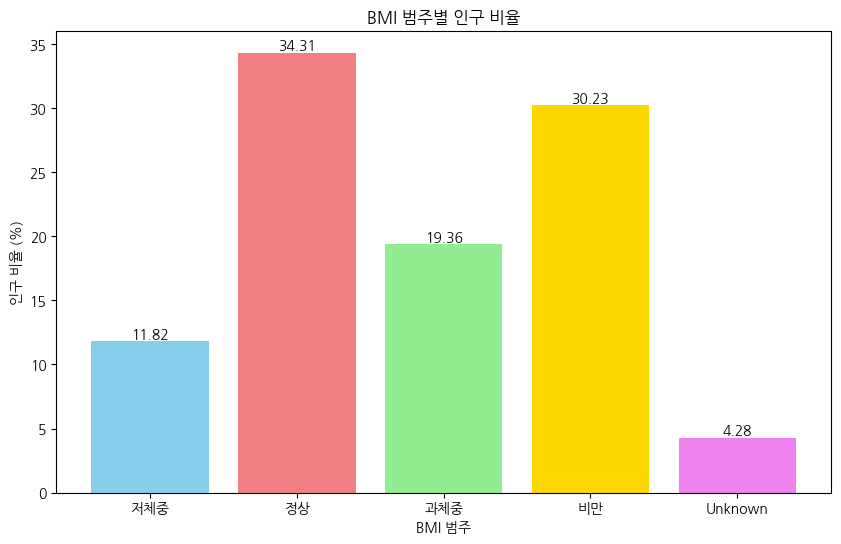

In [ ]:
import matplotlib.pyplot as plt

# BMI 범주별 인구 비율 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))

# 원하는 순서대로 인덱스 재정렬
ordered_categories = ['저체중', '정상', '과체중', '비만', 'Unknown']
bmi_category_proportion_ordered = bmi_category_proportion.reindex(ordered_categories)


bars = plt.bar(bmi_category_proportion_ordered.index, bmi_category_proportion_ordered.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])

plt.xlabel('BMI 범주', color='black')
plt.ylabel('인구 비율 (%)', color='black')
plt.title('BMI 범주별 인구 비율')

# x축, y축 눈금 및 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
plt.xticks(color='black')
plt.yticks(color='black')

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

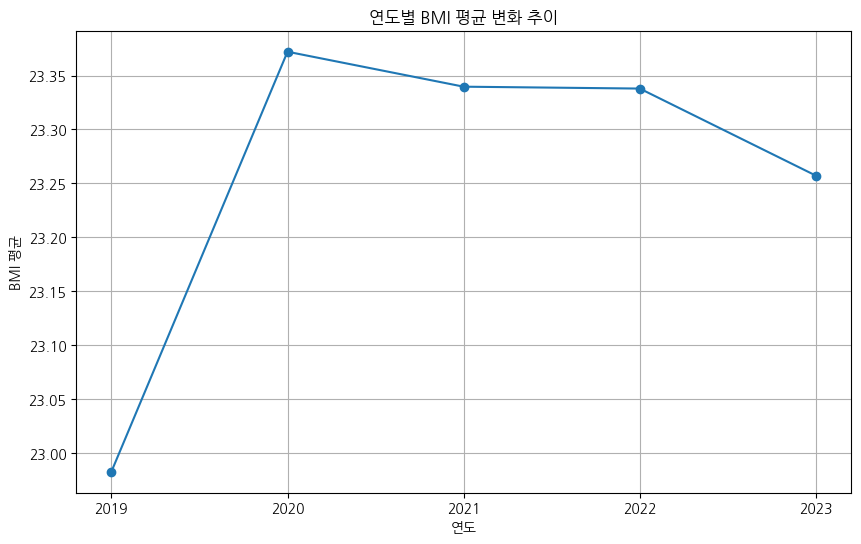

In [ ]:
import matplotlib.pyplot as plt

# 연도별 BMI 평균 시각화
plt.figure(figsize=(10, 6))
plt.plot(average_bmi_by_year.index, average_bmi_by_year.values, marker='o', color='tab:blue')

plt.xlabel('연도', color='black')
plt.ylabel('BMI 평균', color='black')
plt.title('연도별 BMI 평균 변화 추이')
plt.xticks(average_bmi_by_year.index, color='black') # 연도 값을 x축 눈금으로 설정
plt.yticks(color='black')
plt.grid(True)

# 그래프 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')


plt.show()

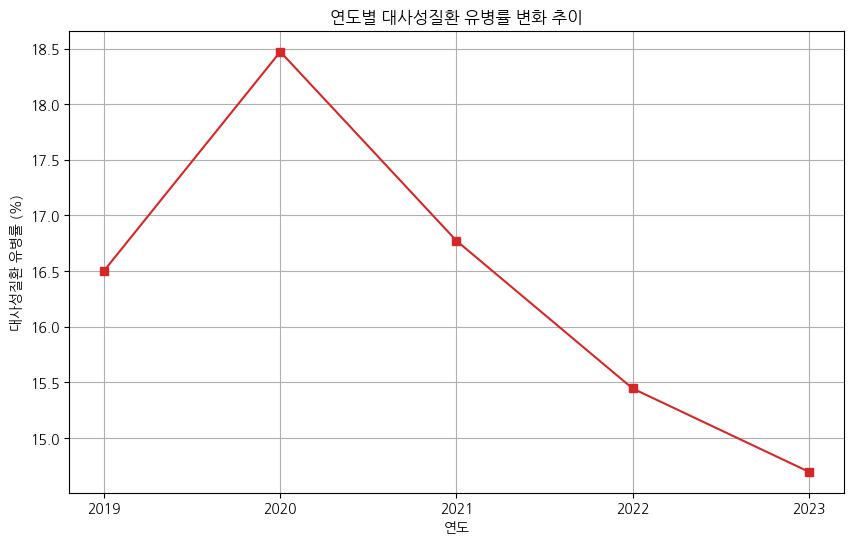

In [ ]:
import matplotlib.pyplot as plt

# 연도별 대사성질환 유병률 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_mets_prevalence.index, yearly_mets_prevalence.values, marker='s', color='tab:red')

plt.xlabel('연도', color='black')
plt.ylabel('대사성질환 유병률 (%)', color='black')
plt.title('연도별 대사성질환 유병률 변화 추이')
plt.xticks(yearly_mets_prevalence.index, color='black') # 연도 값을 x축 눈금으로 설정
plt.yticks(color='black')
plt.grid(True)

# 그래프 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')


plt.show()

## 성별 bmi 평균 시각화

### Subtask:
성별에 따른 BMI 평균 차이를 막대 그래프 등으로 시각화합니다.


**Reasoning**:
Visualize the average BMI by sex using a bar chart, excluding the unknown sex category and setting appropriate labels, title, and axis colors.



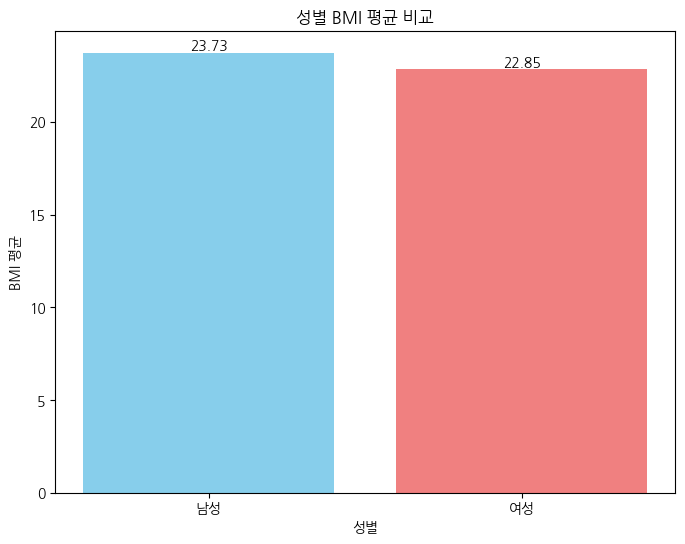

In [ ]:
import matplotlib.pyplot as plt

# 성별에 따른 BMI 평균 시각화 (막대 그래프)
# sex 88.0 (NaN) 값을 제외하고 시각화합니다.
average_bmi_by_sex_filtered = average_bmi_by_sex.dropna()

plt.figure(figsize=(8, 6))
bars = plt.bar(average_bmi_by_sex_filtered.index.astype(str), average_bmi_by_sex_filtered.values, color=['skyblue', 'lightcoral'])

plt.xlabel('성별', color='black')
plt.ylabel('BMI 평균', color='black')
plt.title('성별 BMI 평균 비교')

# x축 눈금 레이블 변경
plt.xticks([0, 1], ['남성', '여성'], color='black')

# y축 눈금 레이블 색상 설정
plt.yticks(color='black')

# 그래프 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')


# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment

plt.show()

## 연령대별 bmi 평균 시각화

### Subtask:
연령대별 BMI 평균 차이를 막대 그래프 등으로 시각화합니다.


**Reasoning**:
Create a bar plot to visualize the average BMI by age group, add labels and title, set axis and spine colors to black, display values on bars, and show the plot.



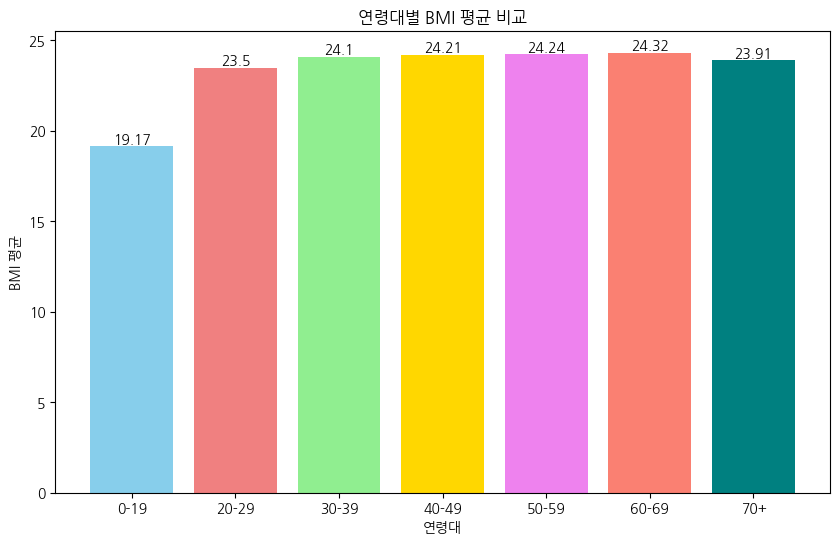

In [ ]:
import matplotlib.pyplot as plt

# 연령대별 BMI 평균 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
bars = plt.bar(average_bmi_by_age_group.index, average_bmi_by_age_group.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet', 'salmon', 'teal'])

plt.xlabel('연령대', color='black')
plt.ylabel('BMI 평균', color='black')
plt.title('연령대별 BMI 평균 비교')

# x축, y축 눈금 및 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
plt.xticks(color='black')
plt.yticks(color='black')


# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

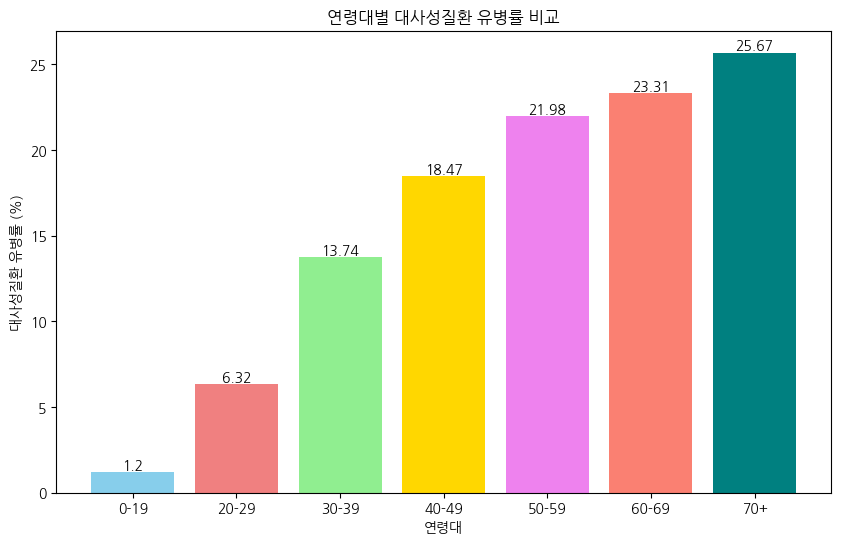

In [ ]:
import matplotlib.pyplot as plt

# 연령대별 대사성질환 유병률 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_mets_prevalence.index, age_group_mets_prevalence.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet', 'salmon', 'teal'])

plt.xlabel('연령대', color='black')
plt.ylabel('대사성질환 유병률 (%)', color='black')
plt.title('연령대별 대사성질환 유병률 비교')

# x축, y축 눈금 및 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
plt.xticks(color='black')
plt.yticks(color='black')

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

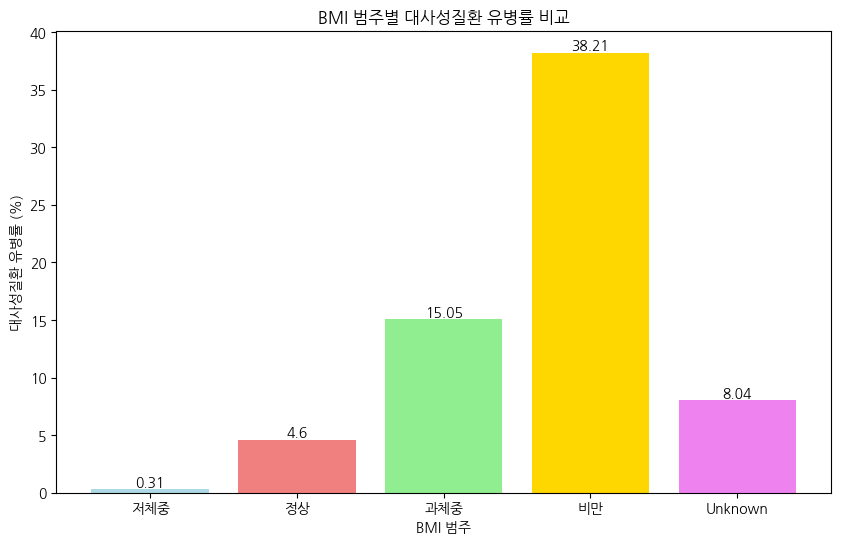

In [ ]:
import matplotlib.pyplot as plt

# BMI 범주별 대사성질환 유병률 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))

# 원하는 순서대로 인덱스 재정렬
ordered_categories = ['저체중', '정상', '과체중', '비만', 'Unknown']
bmi_category_mets_prevalence_ordered = bmi_category_mets_prevalence.reindex(ordered_categories)


bars = plt.bar(bmi_category_mets_prevalence_ordered.index, bmi_category_mets_prevalence_ordered.values, color=['lightblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])

plt.xlabel('BMI 범주', color='black')
plt.ylabel('대사성질환 유병률 (%)', color='black')
plt.title('BMI 범주별 대사성질환 유병률 비교')

# x축, y축 눈금 및 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
plt.xticks(color='black')
plt.yticks(color='black')

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

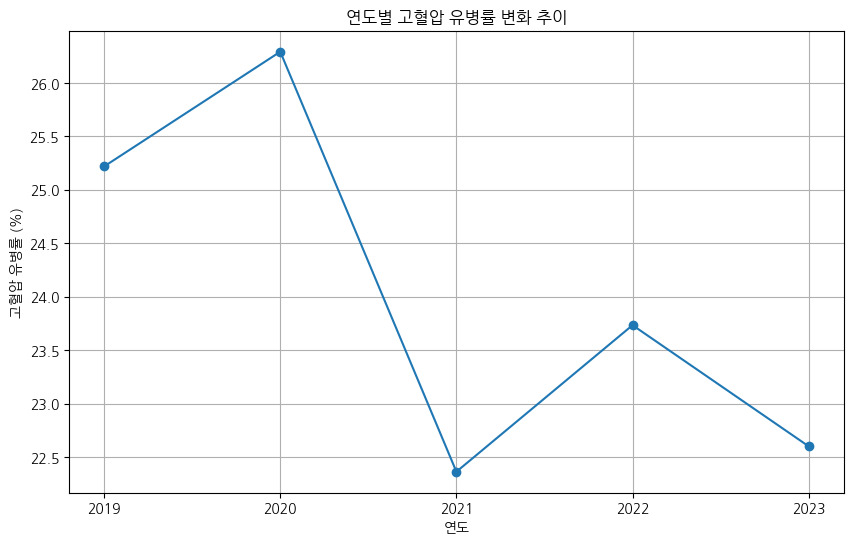

In [ ]:
import matplotlib.pyplot as plt

# 연도별 고혈압 유병률 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_high_blood_pressure_prevalence.index, yearly_high_blood_pressure_prevalence.values, marker='o', color='tab:blue')

plt.xlabel('연도', color='black')
plt.ylabel('고혈압 유병률 (%)', color='black')
plt.title('연도별 고혈압 유병률 변화 추이')
plt.xticks(yearly_high_blood_pressure_prevalence.index, color='black') # 연도 값을 x축 눈금으로 설정
plt.yticks(color='black')
plt.grid(True)

# 그래프 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

plt.show()

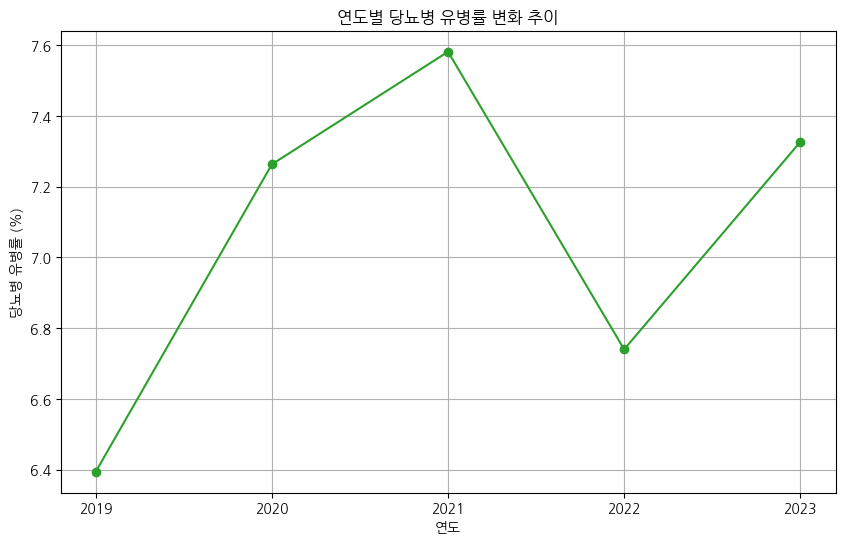

In [ ]:
import matplotlib.pyplot as plt

# 연도별 당뇨병 유병률 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_diabetes_prevalence.index, yearly_diabetes_prevalence.values, marker='o', color='tab:green')

plt.xlabel('연도', color='black')
plt.ylabel('당뇨병 유병률 (%)', color='black')
plt.title('연도별 당뇨병 유병률 변화 추이')
plt.xticks(yearly_diabetes_prevalence.index, color='black') # 연도 값을 x축 눈금으로 설정
plt.yticks(color='black')
plt.grid(True)

# 그래프 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

plt.show()

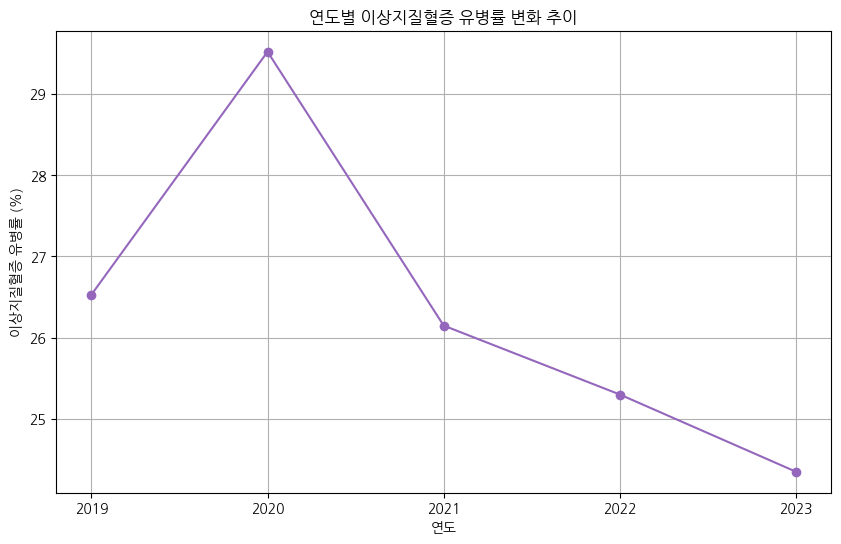

In [ ]:
import matplotlib.pyplot as plt

# 연도별 이상지질혈증 유병률 시각화
plt.figure(figsize=(10, 6))
plt.plot(yearly_dyslipidemia_prevalence.index, yearly_dyslipidemia_prevalence.values, marker='o', color='tab:purple')

plt.xlabel('연도', color='black')
plt.ylabel('이상지질혈증 유병률 (%)', color='black')
plt.title('연도별 이상지질혈증 유병률 변화 추이')
plt.xticks(yearly_dyslipidemia_prevalence.index, color='black') # 연도 값을 x축 눈금으로 설정
plt.yticks(color='black')
plt.grid(True)

# 그래프 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

plt.show()

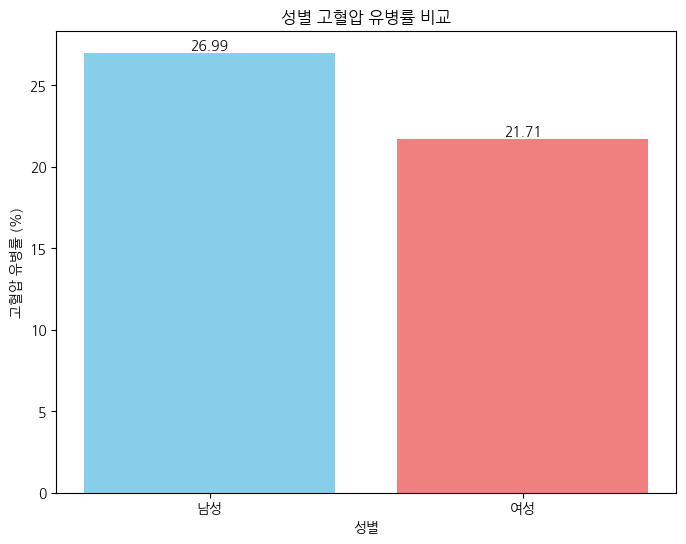

In [ ]:
import matplotlib.pyplot as plt

# 성별 고혈압 유병률 시각화 (막대 그래프)
# sex 88.0 (NaN) 값을 제외하고 시각화합니다.
sex_high_blood_pressure_prevalence_filtered = sex_high_blood_pressure_prevalence.dropna()
# 유병률이 0인 항목 제외
sex_high_blood_pressure_prevalence_filtered = sex_high_blood_pressure_prevalence_filtered[sex_high_blood_pressure_prevalence_filtered > 0]


plt.figure(figsize=(8, 6))
bars = plt.bar(sex_high_blood_pressure_prevalence_filtered.index.astype(str), sex_high_blood_pressure_prevalence_filtered.values, color=['skyblue', 'lightcoral'])

plt.xlabel('성별', color='black')
plt.ylabel('고혈압 유병률 (%)', color='black')
plt.title('성별 고혈압 유병률 비교')

# x축 눈금 레이블 변경
plt.xticks([0, 1], ['남성', '여성'], color='black')

# y축 눈금 레이블 색상 설정
plt.yticks(color='black')

# 그래프 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')


# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment

plt.show()

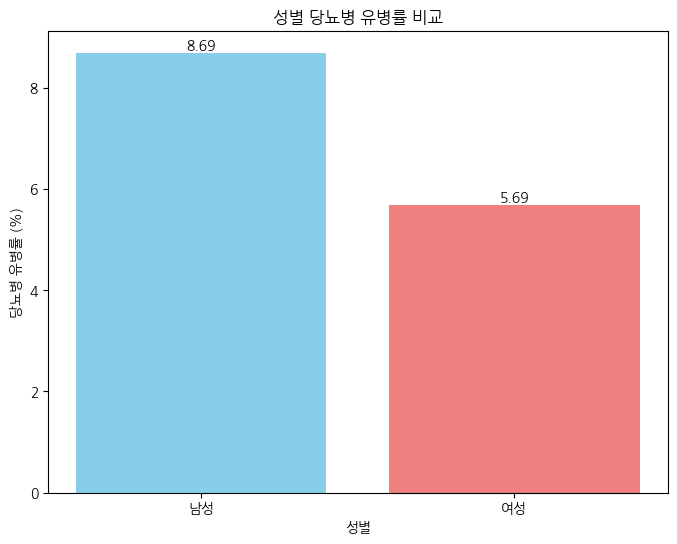

In [ ]:
import matplotlib.pyplot as plt

# 성별 당뇨병 유병률 시각화 (막대 그래프)
# sex 88.0 (NaN) 값을 제외하고 시각화합니다.
sex_diabetes_prevalence_filtered = sex_diabetes_prevalence.dropna()
# 유병률이 0인 항목 제외
sex_diabetes_prevalence_filtered = sex_diabetes_prevalence_filtered[sex_diabetes_prevalence_filtered > 0]

plt.figure(figsize=(8, 6))
bars = plt.bar(sex_diabetes_prevalence_filtered.index.astype(str), sex_diabetes_prevalence_filtered.values, color=['skyblue', 'lightcoral'])

plt.xlabel('성별', color='black')
plt.ylabel('당뇨병 유병률 (%)', color='black')
plt.title('성별 당뇨병 유병률 비교')

# x축 눈금 레이블 변경
plt.xticks([0, 1], ['남성', '여성'], color='black')

# y축 눈금 레이블 색상 설정
plt.yticks(color='black')

# 그래프 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

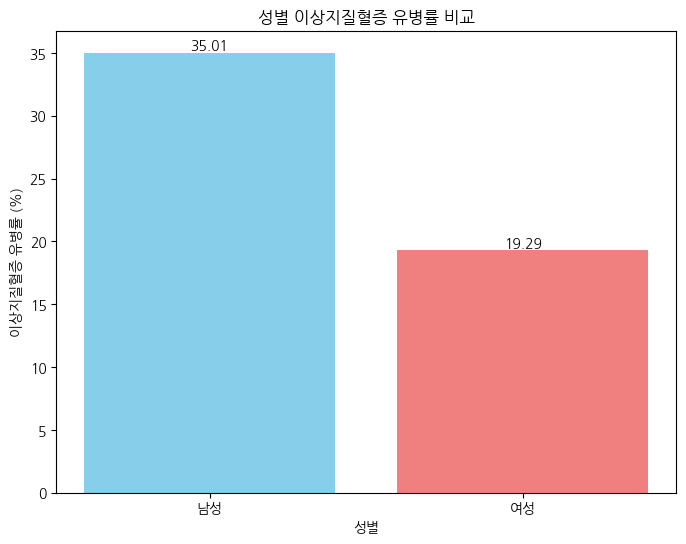

In [ ]:
import matplotlib.pyplot as plt

# 성별 이상지질혈증 유병률 시각화 (막대 그래프)
# sex 88.0 (NaN) 값을 제외하고 시각화합니다.
sex_dyslipidemia_prevalence_filtered = sex_dyslipidemia_prevalence.dropna()
# 유병률이 0인 항목 제외
sex_dyslipidemia_prevalence_filtered = sex_dyslipidemia_prevalence_filtered[sex_dyslipidemia_prevalence_filtered > 0]

plt.figure(figsize=(8, 6))
bars = plt.bar(sex_dyslipidemia_prevalence_filtered.index.astype(str), sex_dyslipidemia_prevalence_filtered.values, color=['skyblue', 'lightcoral'])

plt.xlabel('성별', color='black')
plt.ylabel('이상지질혈증 유병률 (%)', color='black')
plt.title('성별 이상지질혈증 유병률 비교')

# x축 눈금 레이블 변경
plt.xticks([0, 1], ['남성', '여성'], color='black')

# y축 눈금 레이블 색상 설정
plt.yticks(color='black')

# 그래프 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

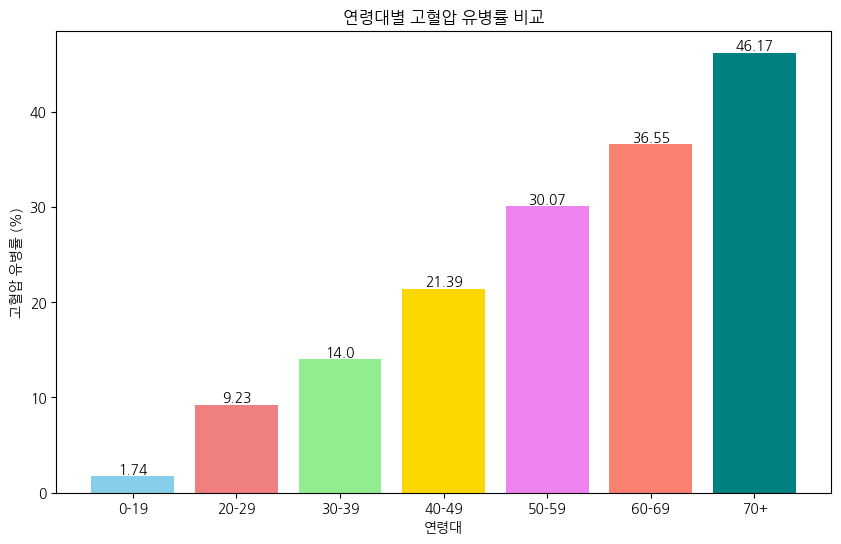

In [ ]:
import matplotlib.pyplot as plt

# 연령대별 고혈압 유병률 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
# 색맹 친화적인 컬러 팔레트 사용 예시
# colors = plt.cm.tab10.colors # tab10 팔레트 사용

bars = plt.bar(age_group_high_blood_pressure_prevalence.index, age_group_high_blood_pressure_prevalence.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet', 'salmon', 'teal'])

plt.xlabel('연령대', color='black')
plt.ylabel('고혈압 유병률 (%)', color='black')
plt.title('연령대별 고혈압 유병률 비교')

# x축, y축 눈금 및 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
plt.xticks(color='black')
plt.yticks(color='black')

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

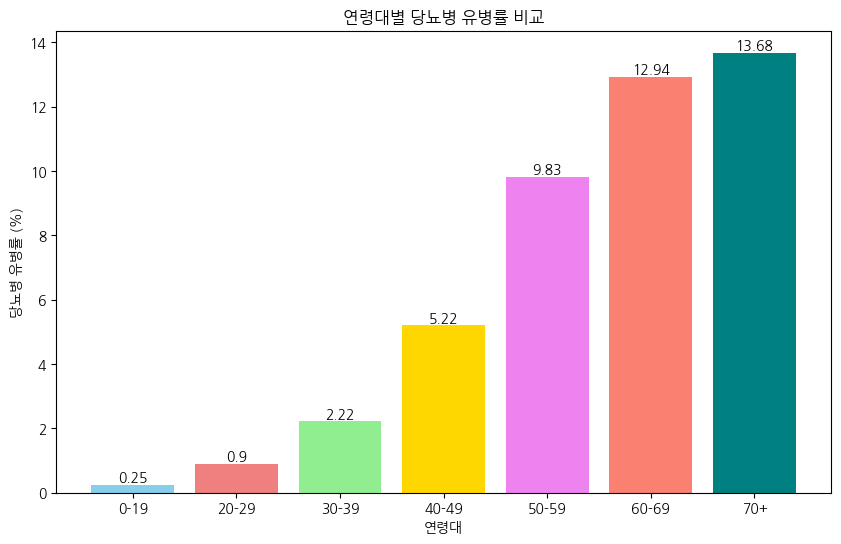

In [ ]:
import matplotlib.pyplot as plt

# 연령대별 당뇨병 유병률 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_diabetes_prevalence.index, age_group_diabetes_prevalence.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet', 'salmon', 'teal'])

plt.xlabel('연령대', color='black')
plt.ylabel('당뇨병 유병률 (%)', color='black')
plt.title('연령대별 당뇨병 유병률 비교')

# x축, y축 눈금 및 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
plt.xticks(color='black')
plt.yticks(color='black')

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

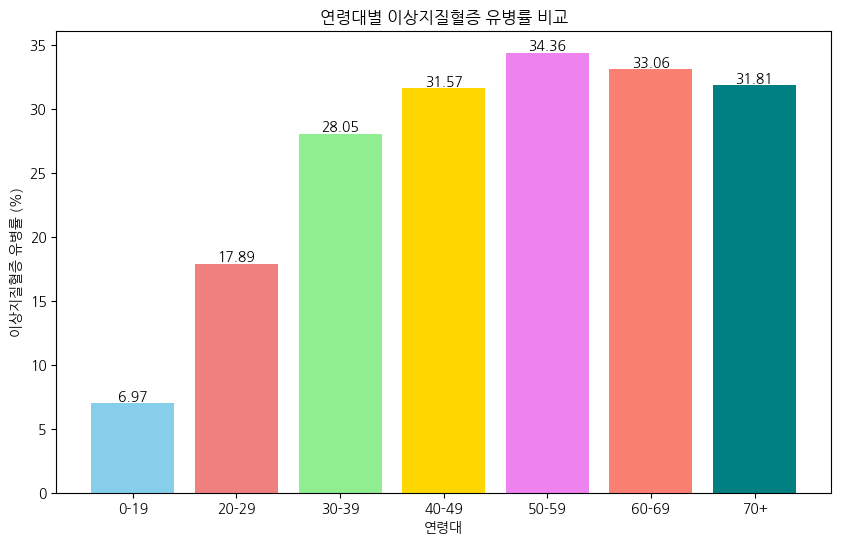

In [ ]:
import matplotlib.pyplot as plt

# 연령대별 이상지질혈증 유병률 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
bars = plt.bar(age_group_dyslipidemia_prevalence.index, age_group_dyslipidemia_prevalence.values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet', 'salmon', 'teal'])

plt.xlabel('연령대', color='black')
plt.ylabel('이상지질혈증 유병률 (%)', color='black')
plt.title('연령대별 이상지질혈증 유병률 비교')

# x축, y축 눈금 및 테두리 색상 설정
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
plt.xticks(color='black')
plt.yticks(color='black')

# 막대 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

## 분석 결과 요약

**1. BMI 변화 분석:**
*   **연도별 BMI 평균:** 2019년부터 2023년까지 연도별 BMI 평균은 약 22.98에서 23.37 사이로 나타났으며, 2020년에 소폭 상승했다가 이후 비슷한 수준을 유지하거나 약간 감소하는 경향을 보였습니다.
*   **코로나19 팬데믹 이전/이후 BMI:** 팬데믹 이전(2019년)의 평균 BMI는 22.98, 팬데믹 이후(2020-2023년)의 평균 BMI는 23.33으로, 팬데믹 이후에 평균 BMI가 소폭 증가한 것을 확인할 수 있습니다.
*   **성별 BMI:** 남성(1.0)의 평균 BMI는 약 23.73으로 여성(2.0)의 평균 BMI 약 22.85보다 높게 나타났습니다.
*   **연령대별 BMI:** 임의로 구분한 연령대(2019-2020, 2021-2022, 2023)별 평균 BMI는 큰 차이 없이 23.17에서 23.34 사이에 분포했습니다.

**2. 대사성질환 유병률 분석 (전체):**
*   **연도별 대사성질환 유병률:** 연도별 대사성질환 유병률은 2020년에 약 18.47%로 가장 높았고, 이후 감소하여 2023년에는 약 14.70%를 기록했습니다.
*   **코로나19 팬데믹 이전/이후 대사성질환 유병률:** 카이제곱 검정 결과, 코로나19 팬데믹 이전과 이후의 대사성질환 유병률에 통계적으로 유의한 차이가 없는 것으로 나타났습니다 (p-value = 1.0000).
*   **성별 대사성질환 유병률:** 남성(1.0)의 대사성질환 유병률은 약 23.81%로 여성(2.0)의 약 10.29%보다 현저히 높게 나타났으며, 이는 통계적으로 유의한 차이입니다 (p-value = 0.0000).
*   **연령대별 대사성질환 유병률:** 임의로 구분한 연령대별 대사성질환 유병률은 2019-2020년 약 17.44%, 2021-2022년 약 16.15%, 2023년 약 14.70%로 연령대가 높을수록(이른 연도) 유병률이 높은 경향을 보였으며, 이는 통계적으로 유의한 차이입니다 (p-value = 0.0000).

**3. BMI와 대사성질환 상관 분석:**
*   **BMI 범주별 대사성질환 유병률:** BMI 범주가 높아질수록 대사성질환 유병률이 크게 증가하는 명확한 경향을 보였습니다. 저체중(0.31%)과 정상(4.60%) 범주에 비해 과체중(15.05%) 및 비만(38.21%) 범주에서 대사성질환 유병률이 현저히 높았으며, 이는 통계적으로 유의한 차이입니다 (p-value = 0.0000).

**4. 세부 질환별 분석:**
*   **고혈압 유병률:** 연도별로 다소 변동이 있으나 22~26% 수준을 보였습니다. 남성의 유병률이 여성보다 높았고, 연령대가 높을수록(이른 연도) 유병률이 높은 경향을 보였습니다.
*   **당뇨병 유병률:** 연도별로 6~7% 수준을 보였습니다. 남성의 유병률이 여성보다 높았고, 연령대가 높을수록(이른 연도) 유병률이 높은 경향을 보였습니다.
*   **이상지질혈증 유병률:** 연도별로 24~29% 수준을 보였습니다. 남성의 유병률이 여성보다 현저히 높았고, 연령대가 높을수록(이른 연도) 유병률이 높은 경향을 보였습니다.

전반적으로 분석 기간 동안 평균 BMI는 소폭 증가하는 경향을 보였으며, 성별과 연령대에 따라 BMI 및 대사성질환 유병률에 유의미한 차이가 있음을 확인했습니다. 특히 BMI 범주는 대사성질환 유병률과 강한 상관관계를 보였습니다.